# Name : Tharindu O.K.D
# Index No. : 190622R

### Question 01

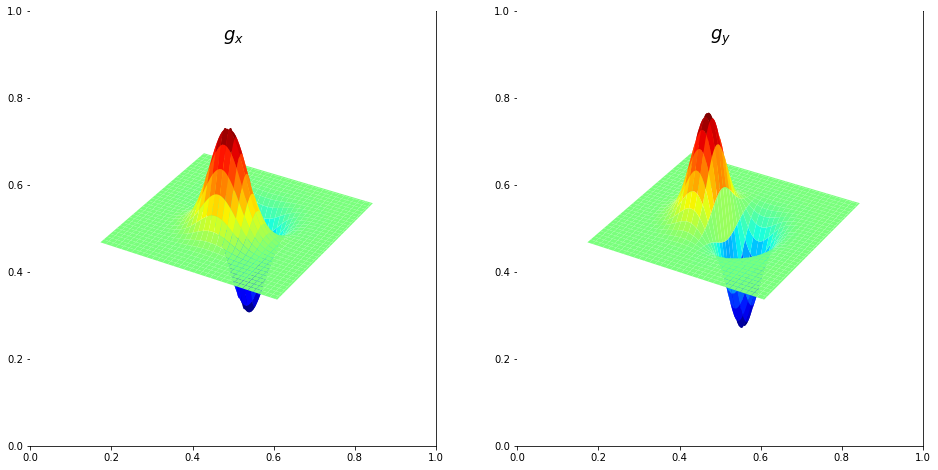

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122, projection="3d")
step = 0.1
sigma = 1
X = np.arange(-5, 5 + step, step)
Y = np.arange(-5, 5 + step, step)
XX, YY = np.meshgrid(X, Y)
g = np.exp(-(XX**2 + YY**2) / (2*sigma**2))
g /= np.sum(g)
sobel_v_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobel_h_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

g_x = cv.filter2D(g, -1, sobel_v_kernel)
g_y = cv.filter2D(g, -1, sobel_h_kernel) 

surf = ax1.plot_surface(XX, YY, g_x, cmap=cm.jet)
surf = ax2.plot_surface(XX, YY, g_y, cmap=cm.jet)
ax1.set_title("$g_x$", fontsize=18)
ax2.set_title("$g_y$", fontsize=18)

ax1.axis("off")
ax2.axis("off")
plt.show()


### Question 02

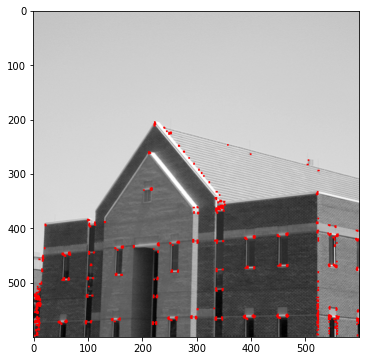

In [10]:
img = cv.imread("building.tif", cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
conners = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(conners, None)
img[dst > 0.01*dst.max()] = [0, 0, 255]

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

### Question 03

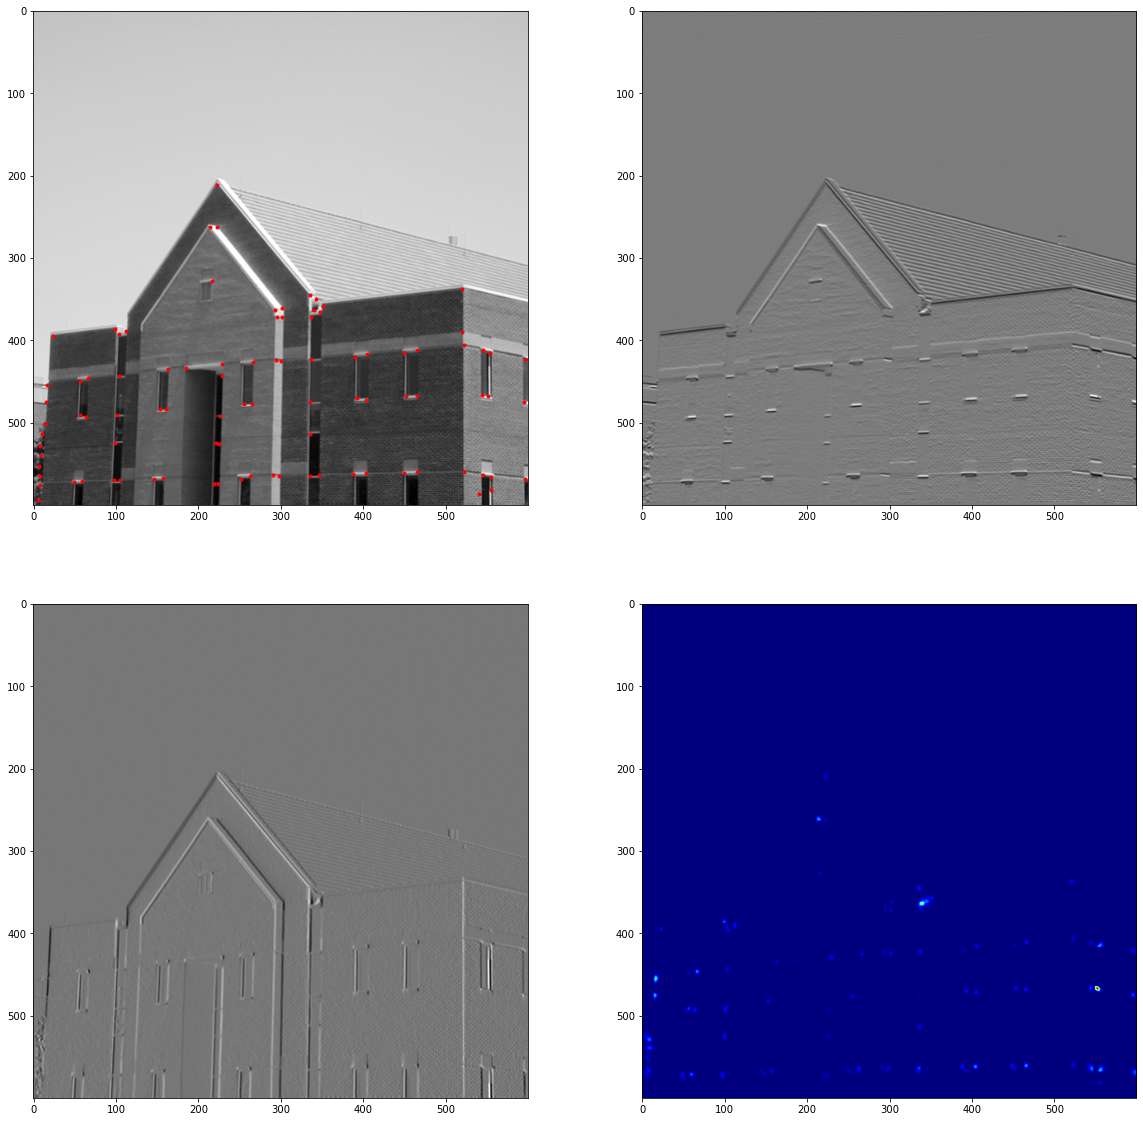

In [11]:
from skimage.feature import peak_local_max
img = cv.imread("building.tif", cv.IMREAD_COLOR)
assert img is not None

I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
I = np.float32(I)
sobel_v_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobel_h_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

Ix = cv.filter2D(I, -1, sobel_v_kernel)
Iy = cv.filter2D(I, -1, sobel_h_kernel)
sigma = 3
ksize = 7
m11 = cv.GaussianBlur(Ix*Ix, (ksize, ksize), sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize, ksize), sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy, (ksize, ksize), sigma)

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R = det - alpha*trace**2
R[R < 1e8] = 0
cordinates = peak_local_max(R, min_distance=2)


fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0, 0].imshow(img, cmap="gray")
ax[0, 0].plot(cordinates[:, 1], cordinates[:, 0], 'r.')
ax[0, 1].imshow(Ix + 127, cmap="gray")
ax[1, 0].imshow(Iy + 127, cmap="gray")
ax[1, 1].imshow(R + 127, cmap=cm.jet)
plt.show()


### Question 04

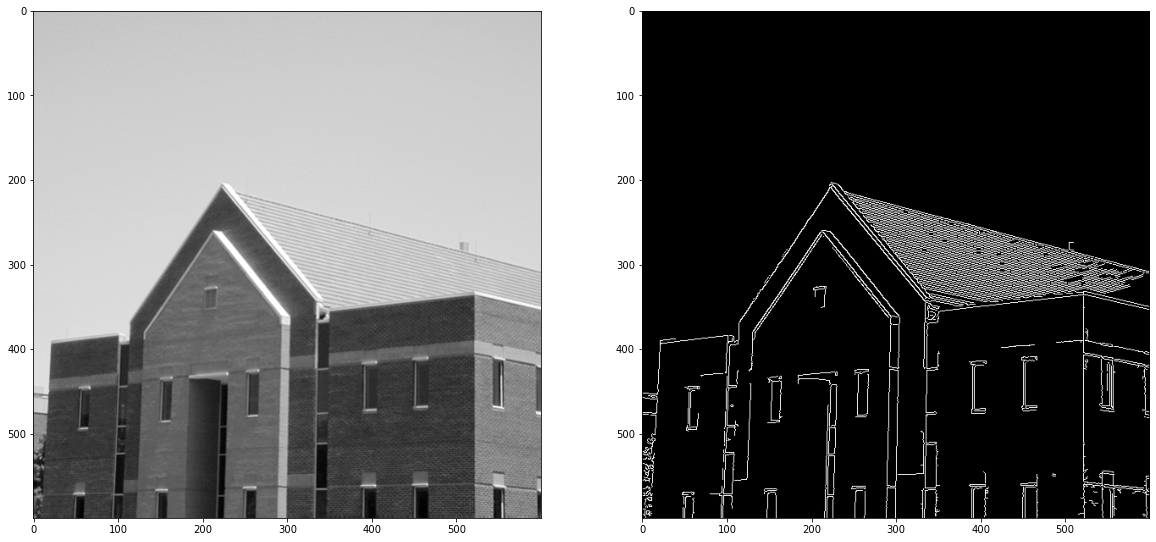

In [12]:
img = cv.imread("building.tif", cv.IMREAD_GRAYSCALE)
assert img is not None

edges = cv.Canny(img, 100, 200)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[1].imshow(edges, cmap="gray", vmin=0, vmax=255)
plt.show()